In [4]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Text(0, 0.5, 'Number of Jobs')

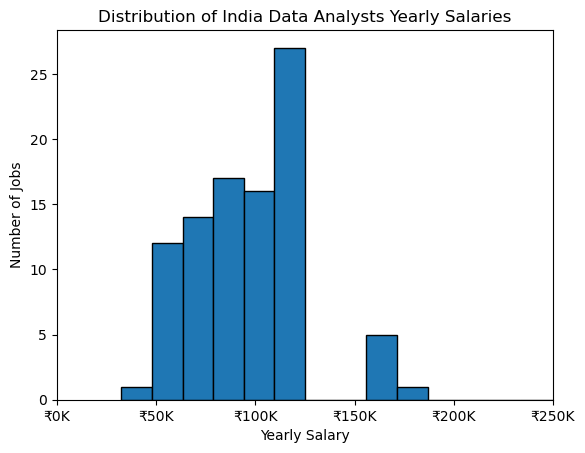

In [14]:
# Get the data analyst job in india
df_da_ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Getting average salary yearly
df_da_ind['salary_year_avg'] = df_da_ind['salary_year_avg']
df_da_ind['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

# Clearing the outliers from data
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'₹{int(x/1000)}K' ))

plt.title('Distribution of India Data Analysts Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')